In [7]:

#This is the active learner implementation that works 
# it is also able to run the random sampling method
# it is able to run tests on varying amounts of datasamples

#Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd 
from statistics import mean 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.calibration import CalibratedClassifierCV

#Main data set with three dimensions x and y coordinates and z for class
X1 = np.array([
              [1,2,-1],[2,3,-1],[3,4,-1],[4,7,-1],[7,8,-1],[8,9,-1],[9,10,-1],[10,1,1],
              [1,3,-1],[2,4,-1],[3,7,-1],[4,8,-1],[7,9,-1],[8,10,-1],[9,1,1],[10,2,1],
              [1,4,-1],[2,7,-1],[3,8,-1],[4,9,-1],[7,10,-1],[8,1,1],[9,2,1],[10,3,1],
              
              [5,4,1],[5,7,-1],[5,8,-1],[5,9,-1],[5,10,-1],[5,1,1],[5,2,1],[5,3,1],
              [6,4,1],[6,7,-1],[6,8,-1],[6,9,-1],[6,10,-1],[6,1,1],[6,2,1],[6,3,1],
              [5,6,-1], [6,5,1],    
              
              [1,7,-1],[2,8,-1],[3,9,-1],[4,10,-1],[7,1,1],[8,2,1],[9,3,1],[10,4,1],
              [1,8,-1],[2,9,-1],[3,10,-1],[4,1,1],[7,2,1],[8,3,1],[9,4,1],[10,7,1],
              [1,9,-1],[2,10,-1],[3,1,1],[4,2,1],[7,3,1],[8,4,1],[9,7,1],[10,8,1],
              [1,10,-1],[2,1,1],[3,2,1],[4,3,1],[7,4,1],[8,7,1],[9,8,1],[10,9,1],
              [1,5,-1],[2,5,-1],[3,5,-1],[4,5,-1],[7,5,1],[8,5,1],[9,5,1],[10,5,1],
              [1,6,-1],[2,6,-1],[3,6,-1],[4,6,-1],[7,6,1],[8,6,1],[9,6,1],[10,6,1]
             ])



array size at start: 5
array size at end is: 5


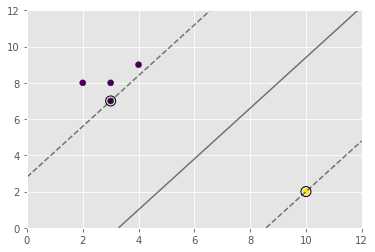

array size at end for testing: 5
Accuracy by active model : 92.0
Accuracy by random : 84.0
array size at start: 5
array size at end is: 5


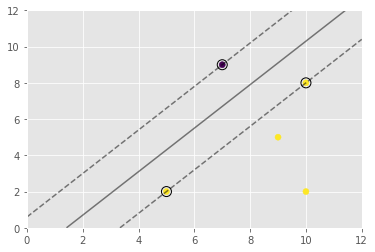

array size at end for testing: 5
Accuracy by active model : 96.0
Accuracy by random : 84.0
array size at start: 5
array size at end is: 5


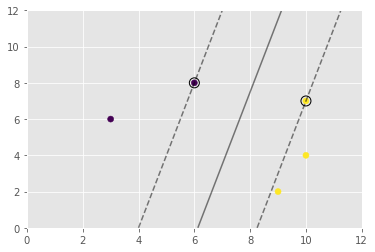

array size at end for testing: 5
Accuracy by active model : 76.0
Accuracy by random : 100.0
array size at start: 5
array size at end is: 5


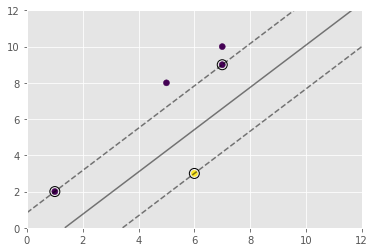

array size at end for testing: 5
Accuracy by active model : 96.0
Accuracy by random : 92.0
array size at start: 5
array size at end is: 11


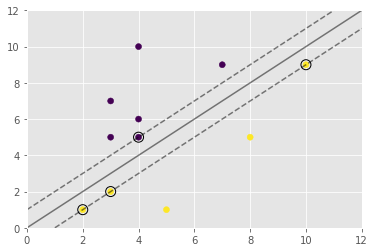

array size at end for testing: 11
Accuracy by active model : 100.0
Accuracy by random : 64.0


Avg accuracy by active model : 91.2
[84.0, 100.0, 72.0, 100.0, 100.0]

Avg accuracy by random sampling : 84.8
[84.0, 84.0, 100.0, 92.0, 64.0]

accuracy and values used active learning  [5, 5, 5, 5, 11]
accuracy and values used random sampling [5, 5, 5, 5, 11]
   active learner %  samples used  random leaner%   rand samples
0              84.0             5            84.0              5
1             100.0             5            84.0              5
2              72.0             5           100.0              5
3             100.0             5            92.0              5
4             100.0            11            64.0             11
Avg accuracy by active model :
91.2
Avg accuracy by random sampling :
84.8


In [10]:
# split dataset into test set, train set and unlabel pool 
def split(dataset, train_size, test_size): 
    x = dataset[:,:-1] 
    y = dataset[:,-1] 
    x_train, x_pool, y_train, y_pool = train_test_split( 
        x, y, train_size = train_size) 
    unlabel, x_test, label, y_test = train_test_split( 
        x_pool, y_pool, test_size = test_size) 
    return x_train, y_train, x_test, y_test, unlabel, label 
  

# read dataset 
dataset = X1

# run both models 100 times and take the average of their accuracy 
accuracy1, accuracy2 = [], []  # arrays to store accuracy of different models 
perc_num1 , perc_num2 = [], [] #accuracy and number of datapoints used.
#Main block of code with a loop running depending on how many tests i would like done.
for i in range(5): 
    # split dataset into train(5 %), test(25 %), unlabel(70 %) 
    x_train, y_train, x_test, y_test, unlabel, label = split( 
        dataset, 5, 25) 
 
    print("array size at start:" ,len(x_train))
    # train model by active learning 
    for i in range(5): 
        classifier1 = svm.SVC(kernel='linear', C=1,probability=True)
        classifier1.fit(x_train, y_train)
        y_prob = classifier1.predict_proba(unlabel)[:, 0] 
        p = 0.47 # setting value for range of uncertainty
        uncert_index = [] 
        for i in range(20): #how many times it runs through the datapoints and trains on them
            if(y_prob[i] >= p and y_prob[i] <= 1-p):  # adding the most uncertain datapoints
                uncert_index.append(i) 
        x_train = np.append(unlabel[uncert_index, :], x_train, axis = 0) 
        y_train = np.append(label[uncert_index], y_train) 
        unlabel = np.delete(unlabel, uncert_index, axis = 0) 
        label = np.delete(label, uncert_index) 
    print("array size at end is:" ,len(x_train))# line to aid in find errors
    
    #training the classifier with active learning
    classifier2 = svm.SVC(kernel='linear', C=1,probability=True) 
    classifier2.fit(x_train, y_train) 
    
    #calculating accuracy
    accuracy1.append(classifier2.score(x_test, y_test)*100) 
    perc_num1.append(len(x_train))
    
    #plot the graph
    plt.scatter(x_train[:, 0], x_train[:, 1],c=y_train)
    ax = plt.gca()
    xx = np.linspace(0, 12)
    yy = np.linspace(0, 12)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier2.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
      linestyles=['--', '-', '--'])
    ax.scatter(classifier1.support_vectors_[:, 0], classifier2.support_vectors_[:, 1], s=100,
    linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    
    #Split the data set to match the inital one for fair testing
    train_size = x_train.shape[0]/dataset.shape[0] 
    x_train, y_train, x_test, y_test, unlabel, label = split( 
        dataset, train_size, 25) 
    print("array size at end for testing:" ,len(x_train))
    
    #train model without active learning 
    classifier3 = svm.SVC(kernel='linear', C=1,probability=True) 
    classifier3.fit(x_train, y_train) 
    accuracy2.append(classifier3.score(x_test, y_test)*100) 
    perc_num2.append(len(x_train))
    print("Accuracy by active model :", classifier2.score(x_test, y_test)*100)
    print("Accuracy by random :", classifier3.score(x_test, y_test)*100) 

# These are the outputs which i will be using to organise and use to calculate my end results
print()
print()
print("Avg accuracy by active model :", mean(accuracy1)) 
print(accuracy1)
print()
print("Avg accuracy by random sampling :", mean(accuracy2)) 
print(accuracy2)
print()
print("accuracy and values used active learning " , perc_num1)
print("accuracy and values used random sampling" , perc_num2)

#The Table of results generated
data = {"active learner %": accuracy1 ,"samples used": perc_num1, "random leaner%" : accuracy2 ," rand samples": perc_num2}
df = pd.DataFrame(data=data)
print(df)
print("Avg accuracy by active model :") 
print(mean(accuracy1))
print("Avg accuracy by random sampling :") 
print(mean(accuracy2))

